
<div style="border-radius:10px;
            border : #015a2c solid;
            background-color:#D7D9DB;
           font-size:110%;
           letter-spacing:0.5px;
            text-align: center">
​
<center><h1 style="padding: 25px 0px; color:#015a4c; font-weight: bold; font-family: Cursive">
Amit Project for Data Science Module <br><br>💡💡💡💡💡 <br><br> AI Online 74  </h1></center>
<center><h3 style="padding-bottom: 25px; color:#025b2c; font-weight: bold; font-style:italic; font-family: Cursive">
Using Project: Trip data Ford go bike  </h3></center>     
​
</div>

# Part I - (Dataset Exploration for Ford GoBike)

### worked by (Yassin Mohamed Hassan/2024 )

## Introduction

.

> **Let's introduce our dataset:**


======================================

.

**This data set information was produced from `Ford GoBike` System** the information in it talked about individual rides that were made in a bike-sharing system for covering San Francisco Bay area.** 

.




> ## And here are the main exploring questions 



   **==================================================**



- What is the structure of your dataset?


- What are the main interesting features in the dataset?


- What features in the dataset supported my investigation for these interesting features?




.

> ### Also here are the investigative questions classified into three types



   **================================================**
   
   


###  <a href='#011'> Univariate Exploration</a> 

- <a href='#1'> 1 ) . What is the distribution of `User type`?</a>  
- <a href='#2'> 2 ) . What is the distribution for the `bike share users on all Trips`?</a>  
- <a href='#3'> 3 ) . What is the distribution for users' `ages`?</a>  
- <a href='#4'> 4 ) . Do the users' ages have `outlier` values?</a>
- <a href='#5'> 5 ) . What is the distribution for the trip duration in `minutes`? </a>
- <a href='#6'> 6) . What is the distribution for `member_gender`? </a>
- <a href='#7'> 7) . What is the distribution for the trip duration in `Hours`?  </a>




##  <a href='#111'> Bivariate Exploration</a> 


- <a href='#8'> 8 ) . What the `average duration` of trip for the categories of `user type`? </a>
- <a href='#9'> 9 ) . How long is the duration of the trip for `each gender` in `minutes`? </a>
- <a href='#10'> 10 ) . How long is the duration of the trip for each `user_type` in `minutes`?  </a>
- <a href='#11'> 11 ) . How the user distribution depending on their `Age` and `user_type` ?</a>
- <a href='#12'>12 ). How the user distribution depending on their `Age` and `member_gender` ?  </a>


##  <a href='#1111'> Multivariate Exploration</a> 


- <a href='#13'> 13 ) . What is the Correlation between `each` variable in the dataset?</a>  
- <a href='#14'> 14 ) . What is the Correlation between `specific numeric variables` in the dataset?</a>  
- <a href='#15'> 15 ) . What is the  Correlation between `data_stat` variables in the dataset?</a>  


##  <a href='#1100'> Conclusions </a> 





# <p style="border-radius:15px;border-style:solid;border-color:lightblue;border-width:3px;background-color:lightblue;padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Import Libraries</p>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt

import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv("D:/AMIT/Amit/DataScienceProject/fordgobike-tripdataFor201902.csv")

In [3]:
# here we make overview in high-level for data shape and composition
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183416 entries, 0 to 183415
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183416 non-null  int64  
 1   start_time               183416 non-null  object 
 2   end_time                 183416 non-null  object 
 3   start_station_id         183219 non-null  float64
 4   start_station_name       183219 non-null  object 
 5   start_station_latitude   183416 non-null  float64
 6   start_station_longitude  183416 non-null  float64
 7   end_station_id           183219 non-null  float64
 8   end_station_name         183219 non-null  object 
 9   end_station_latitude     183416 non-null  float64
 10  end_station_longitude    183416 non-null  float64
 11  bike_id                  183416 non-null  int64  
 12  user_type                183416 non-null  object 
 13  member_birth_year        175151 non-null  float64
 14  memb

In [4]:
## check each var  datatype 
dataTypes = df.dtypes
numberDataTypes = df.nunique().sum()
dataframe = pd.DataFrame({"DataType":dataTypes,"Number DataTypes":numberDataTypes}).T
dataframe

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
DataType,int64,object,object,float64,object,float64,float64,float64,object,float64,float64,int64,object,float64,object,object
Number DataTypes,83685,83685,83685,83685,83685,83685,83685,83685,83685,83685,83685,83685,83685,83685,83685,83685


In [5]:
numuric_col = ["duration_sec","start_station_id","start_station_latitude","start_station_longitude","end_station_id","end_station_latitude","end_station_longitude","bike_id","member_birth_year",]
cat_col = [] #List to convert to categorical datatype
for list in df.columns:
    if(list not in numuric_col):
        cat_col.append(list)
print(cat_col)

['start_time', 'end_time', 'start_station_name', 'end_station_name', 'user_type', 'member_gender', 'bike_share_for_all_trip']


In [6]:
#Converting non numeric columns to  categorical
df[cat_col] = df[cat_col].astype("category")
                                                #df['start_time'] = pd.to_numeric(df['start_time'], errors='coerce')
                                                #df['end_time'] = pd.to_numeric(df['end_time'], errors='coerce')
'''
Next step will be checking datatypes again
to assure that the conversion went right
'''
dataTypes = df.dtypes
numberDataTypes = df.nunique().sum()
dataframe = pd.DataFrame({"DataType":dataTypes,"Number DataTypes":numberDataTypes}).T
dataframe

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
DataType,int64,category,category,float64,category,float64,float64,float64,category,float64,float64,int64,category,float64,category,category
Number DataTypes,83685,83685,83685,83685,83685,83685,83685,83685,83685,83685,83685,83685,83685,83685,83685,83685


In [7]:
## I display 15 rows to understand the content values more 
df.head(15)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,53:21.8,42:03.1,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,49:58.6,19:51.8,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,55:35.1,14:42.6,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,41:06.8,08:02.8,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,41:48.8,07:59.7,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,49:47.7,07:17.0,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [8]:
# descriptive statistics for numeric variables
df[numuric_col].describe()
df.shape

(183416, 16)

In [9]:
df[numuric_col].isnull().sum()

duration_sec                  0
start_station_id            197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
member_birth_year          8265
dtype: int64

In [10]:
dublicateditems = df[numuric_col].duplicated()
dublicateditems

0         False
1         False
2         False
3         False
4         False
          ...  
183411    False
183412     True
183413     True
183414     True
183415     True
Length: 183416, dtype: bool



> ### What is the structure of your dataset?





- The structure of the dataset contains  16 columns and 183416 rows.
 
 
- Most variables are Numeric in nature , and here are **dtypes summary :**

        - category(7)
        - float64 (8)
        - int64   (1)
        



> ### What are the main interesting features in the dataset?
  duration_sec



 **We got three main feature areas which are :**
 
 
 
 
- duration_sec
 
 
 
- member_birth_year
 
  
 
  
- member_gender




> ### What features in the dataset supported my investigation for these interesting features?



- member_gender



- member_birth_year



- start_station_longitude



- start_station_latitude




- end_station_longitude




-end_station_latitude




##  More Exploring ideas to begin my investigation

In [11]:
#This code for describing statistical data ideas in a more organized and readable table
'''
getting two points from longtiude and latitude an (x , y) point represent Start Point
and another point represent the end point. where we can get and add the displacement column
which can be used as a feature for expecting the duration time next to member gender.
'''



'\ngetting two points from longtiude and latitude an (x , y) point represent Start Point\nand another point represent the end point. where we can get and add the displacement column\nwhich can be used as a feature for expecting the duration time next to member gender.\n'

In [12]:
# display the information about each column
dataTypes = df.dtypes
numberDataTypes = df.nunique().sum()
numberOfNull = df.isnull().sum()
numberOfDublicated = df.duplicated().sum()
dataframe = pd.DataFrame({"DataType":dataTypes,"Number DataTypes":numberDataTypes,"Null values": numberOfNull,"Duplicated":numberOfDublicated}).T
dataframe


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
DataType,int64,category,category,float64,category,float64,float64,float64,category,float64,float64,int64,category,float64,category,category
Number DataTypes,83685,83685,83685,83685,83685,83685,83685,83685,83685,83685,83685,83685,83685,83685,83685,83685
Null values,0,0,0,197,197,0,0,197,197,0,0,0,0,8265,8265,0
Duplicated,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


## The above result show some missing values exist in some columns So let's display them 



> ## The result above shows many missing data 



###  To fix this issue You will fill these values with --Mean-- for numeric and --Mode--for categorical

In [13]:
# trying to fill missing values in my datset using for loop 
for i in numuric_col:
    df[i].fillna(df[i].mean(),inplace= True)
for i in cat_col:
    df[i].fillna(df[i].mode(),inplace= True) 


C:\Users\ASUS\AppData\Local\Temp\ipykernel_33140\1650919853.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(),inplace= True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_33140\1650919853.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [14]:
dataTypes = df.dtypes
numberDataTypes = df.nunique().sum()
numberOfNull = df.isnull().sum()
numberOfDublicated = df.duplicated().sum()
dataframe = pd.DataFrame({"DataType":dataTypes,"Number DataTypes":numberDataTypes,"Null values": numberOfNull,"Duplicated":numberOfDublicated}).T
dataframe

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
DataType,int64,category,category,float64,category,float64,float64,float64,category,float64,float64,int64,category,float64,category,category
Number DataTypes,83688,83688,83688,83688,83688,83688,83688,83688,83688,83688,83688,83688,83688,83688,83688,83688
Null values,0,0,0,0,197,0,0,0,197,0,0,0,0,0,8265,0
Duplicated,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


### **And with a proper category for other (member gender)**

In [15]:
##  still got a missing value in the member_gender, so let's explore this column more 

print(df.member_gender.head(15))

0       Male
1        NaN
2       Male
3      Other
4       Male
5       Male
6     Female
7       Male
8      Other
9       Male
10    Female
11      Male
12      Male
13       NaN
14      Male
Name: member_gender, dtype: category
Categories (3, object): ['Female', 'Male', 'Other']


In [16]:
# fill  dataset with missing values.
df.member_gender.head(15)

0       Male
1        NaN
2       Male
3      Other
4       Male
5       Male
6     Female
7       Male
8      Other
9       Male
10    Female
11      Male
12      Male
13       NaN
14      Male
Name: member_gender, dtype: category
Categories (3, object): ['Female', 'Male', 'Other']

In [17]:
df.member_gender.fillna(df.member_gender.mode()[0],inplace=True)
df.start_station_name.fillna(df.start_station_name.mode()[0],inplace=True)
df.end_station_name.fillna(df.end_station_name.mode()[0],inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_33140\1913631383.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.member_gender.fillna(df.member_gender.mode()[0],inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_33140\1913631383.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [18]:
df['member_gender'].replace(to_replace="Other",
           value= df.member_gender.mode()[0],inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_33140\3273231970.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['member_gender'].replace(to_replace="Other",
C:\Users\ASUS\AppData\Local\Temp\ipykernel_33140\3273231970.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['member_gender'].replace(to_replace="Other

In [19]:
dataTypes = df.dtypes
numberDataTypes = df.nunique().sum()
numberOfNull = df.isnull().sum()
numberOfDublicated = df.duplicated().sum()
dataframe = pd.DataFrame({"DataType":dataTypes,"Number DataTypes":numberDataTypes,"Null values": numberOfNull,"Duplicated":numberOfDublicated}).T
dataframe

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
DataType,int64,category,category,float64,category,float64,float64,float64,category,float64,float64,int64,category,float64,category,category
Number DataTypes,83687,83687,83687,83687,83687,83687,83687,83687,83687,83687,83687,83687,83687,83687,83687,83687
Null values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Duplicated,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


> ## <mark>The result above shows that we deal with all missing data </mark>

### Now let's check duplicate value

> ##If Not significant duplicated , so won't clean it 


### Now let's check the category columns to make more cleaning dataset 

In [20]:
### check the category columns that included object
'''Already done this step ya doc :) '''

'Already done this step ya doc :) '

 > ## From all previous results above I found  :
 
 
 
 **=========================================================**
 
 

> 1 ) **unique Value** as in ((`member_gender`)) : Not significant , so won't clean it



> 2 ) **Incorrect data type** as in (( `user_type` &&	`member_gender`)) :  significant change , so I need to clean it.


> 3 ) **Good factor** for marketing work as in ((`member_birth_year`)) : so I need to clean it.

In [21]:
##  step  2 ) Incorrect data type as in (( `user_type` &&	`member_gender`)) :  significant change , so  need to clean it.

df['user_type'].head(20)

0       Customer
1       Customer
2       Customer
3     Subscriber
4     Subscriber
5     Subscriber
6     Subscriber
7     Subscriber
8     Subscriber
9     Subscriber
10    Subscriber
11    Subscriber
12      Customer
13    Subscriber
14    Subscriber
15    Subscriber
16    Subscriber
17    Subscriber
18    Subscriber
19      Customer
Name: user_type, dtype: category
Categories (2, object): ['Customer', 'Subscriber']

In [22]:
## check your work 



In [23]:
## step 3 ) Good factor for marketing work as in ((`member_birth_year`)) : so need to clean it.
## To know the target audience's age and serve on them
# create a column for users' age depending on the current year

pd.options.display.float_format = '{:,.2f}'.format # Forammting the decimal points while displaying datadrame
df["age"] = (2024 - df['member_birth_year'])
df["age"].head(15)

0    40.00
1    39.19
2    52.00
3    35.00
4    50.00
5    65.00
6    41.00
7    35.00
8    36.00
9    32.00
10   28.00
11   31.00
12   34.00
13   39.19
14   36.00
Name: age, dtype: float64

In [24]:
df.head(15)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,32:10.1,01:56.0,21.00,Montgomery St BART Station (Market St at 2nd St),37.79,-122.40,13.00,Commercial St at Montgomery St,37.79,-122.40,4902,Customer,"1,984.00",Male,No,40.00
1,42521,53:21.8,42:03.1,23.00,The Embarcadero at Steuart St,37.79,-122.39,81.00,Berry St at 4th St,37.78,-122.39,2535,Customer,"1,984.81",Male,No,39.19
2,61854,13:13.2,24:08.1,86.00,Market St at Dolores St,37.77,-122.43,3.00,Powell St BART Station (Market St at 4th St),37.79,-122.40,5905,Customer,"1,972.00",Male,No,52.00
3,36490,54:26.0,02:36.8,375.00,Grove St at Masonic Ave,37.77,-122.45,70.00,Central Ave at Fell St,37.77,-122.44,6638,Subscriber,"1,989.00",Male,No,35.00
4,1585,54:18.5,20:44.1,7.00,Frank H Ogawa Plaza,37.80,-122.27,222.00,10th Ave at E 15th St,37.79,-122.25,4898,Subscriber,"1,974.00",Male,Yes,50.00
5,1793,49:58.6,19:51.8,93.00,4th St at Mission Bay Blvd S,37.77,-122.39,323.00,Broadway at Kearny,37.80,-122.41,5200,Subscriber,"1,959.00",Male,No,65.00
6,1147,55:35.1,14:42.6,300.00,Palm St at Willow St,37.32,-121.88,312.00,San Jose Diridon Station,37.33,-121.90,3803,Subscriber,"1,983.00",Female,No,41.00
7,1615,41:06.8,08:02.8,10.00,Washington St at Kearny St,37.80,-122.40,127.00,Valencia St at 21st St,37.76,-122.42,6329,Subscriber,"1,989.00",Male,No,35.00
8,1570,41:48.8,07:59.7,10.00,Washington St at Kearny St,37.80,-122.40,127.00,Valencia St at 21st St,37.76,-122.42,6548,Subscriber,"1,988.00",Male,No,36.00
9,1049,49:47.7,07:17.0,19.00,Post St at Kearny St,37.79,-122.40,121.00,Mission Playground,37.76,-122.42,6488,Subscriber,"1,992.00",Male,No,32.00


In [25]:
df["age"].astype(int)
len(df['age'])

183416

In [26]:
## create a function to know the average users ages
def membersAge(age: str):
    print(df[age].mean()) 
membersAge("age") #Enter the age column in string 

39.193495897825315


In [27]:
len(df['age'])

183416

In [28]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,32:10.1,01:56.0,21.00,Montgomery St BART Station (Market St at 2nd St),37.79,-122.40,13.00,Commercial St at Montgomery St,37.79,-122.40,4902,Customer,"1,984.00",Male,No,40.00
1,42521,53:21.8,42:03.1,23.00,The Embarcadero at Steuart St,37.79,-122.39,81.00,Berry St at 4th St,37.78,-122.39,2535,Customer,"1,984.81",Male,No,39.19
2,61854,13:13.2,24:08.1,86.00,Market St at Dolores St,37.77,-122.43,3.00,Powell St BART Station (Market St at 4th St),37.79,-122.40,5905,Customer,"1,972.00",Male,No,52.00
3,36490,54:26.0,02:36.8,375.00,Grove St at Masonic Ave,37.77,-122.45,70.00,Central Ave at Fell St,37.77,-122.44,6638,Subscriber,"1,989.00",Male,No,35.00
4,1585,54:18.5,20:44.1,7.00,Frank H Ogawa Plaza,37.80,-122.27,222.00,10th Ave at E 15th St,37.79,-122.25,4898,Subscriber,"1,974.00",Male,Yes,50.00


In [29]:
## another important factor to offer  marketing services is the trip duration time 

## need to change the time from second to minute to be more usable
df['duration_sec'].dtype
duration_min = (df['duration_sec']/60)
df.insert(0,'duration_min',duration_min)

In [30]:
df.head()

,duration_min,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,869.75,52185,32:10.1,01:56.0,21.00,Montgomery St BART Station (Market St at 2nd St),37.79,-122.40,13.00,Commercial St at Montgomery St,37.79,-122.40,4902,Customer,"1,984.00",Male,No,40.00
1,708.68,42521,53:21.8,42:03.1,23.00,The Embarcadero at Steuart St,37.79,-122.39,81.00,Berry St at 4th St,37.78,-122.39,2535,Customer,"1,984.81",Male,No,39.19
2,"1,030.90",61854,13:13.2,24:08.1,86.00,Market St at Dolores St,37.77,-122.43,3.00,Powell St BART Station (Market St at 4th St),37.79,-122.40,5905,Customer,"1,972.00",Male,No,52.00
3,608.17,36490,54:26.0,02:36.8,375.00,Grove St at Masonic Ave,37.77,-122.45,70.00,Central Ave at Fell St,37.77,-122.44,6638,Subscriber,"1,989.00",Male,No,35.00
4,26.42,1585,54:18.5,20:44.1,7.00,Frank H Ogawa Plaza,37.80,-122.27,222.00,10th Ave at E 15th St,37.79,-122.25,4898,Subscriber,"1,974.00",Male,Yes,50.00


In [31]:
df['duration_sec'].drop

<bound method Series.drop of 0         52185
1         42521
2         61854
3         36490
4          1585
          ...  
183411      271
183412      313
183413      141
183414      139
183415      271
Name: duration_sec, Length: 183416, dtype: int64>

In [32]:
## I need to change the time from second to Houre  to be more usable
df['duration_min'].dtype
duration_hour = (df['duration_min']/60)
df.insert(0,'duration_hour',duration_hour)


In [33]:
df['duration_min'].drop

<bound method Series.drop of 0          869.75
1          708.68
2        1,030.90
3          608.17
4           26.42
           ...   
183411       4.52
183412       5.22
183413       2.35
183414       2.32
183415       4.52
Name: duration_min, Length: 183416, dtype: float64>

In [34]:
df.head()

,duration_hour,duration_min,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,14.50,869.75,52185,32:10.1,01:56.0,21.00,Montgomery St BART Station (Market St at 2nd St),37.79,-122.40,13.00,Commercial St at Montgomery St,37.79,-122.40,4902,Customer,"1,984.00",Male,No,40.00
1,11.81,708.68,42521,53:21.8,42:03.1,23.00,The Embarcadero at Steuart St,37.79,-122.39,81.00,Berry St at 4th St,37.78,-122.39,2535,Customer,"1,984.81",Male,No,39.19
2,17.18,"1,030.90",61854,13:13.2,24:08.1,86.00,Market St at Dolores St,37.77,-122.43,3.00,Powell St BART Station (Market St at 4th St),37.79,-122.40,5905,Customer,"1,972.00",Male,No,52.00
3,10.14,608.17,36490,54:26.0,02:36.8,375.00,Grove St at Masonic Ave,37.77,-122.45,70.00,Central Ave at Fell St,37.77,-122.44,6638,Subscriber,"1,989.00",Male,No,35.00
4,0.44,26.42,1585,54:18.5,20:44.1,7.00,Frank H Ogawa Plaza,37.80,-122.27,222.00,10th Ave at E 15th St,37.79,-122.25,4898,Subscriber,"1,974.00",Male,Yes,50.00



# <p style="border-radius:15px;border-style:solid;border-color:lightblue;border-width:3px;background-color:lightblue;padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Univariate Exploration</p>
# <a id="011"> Univariate Exploration</a>



> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.




# <a id="1"> 1 ) . What is the distribution for User type?</a>

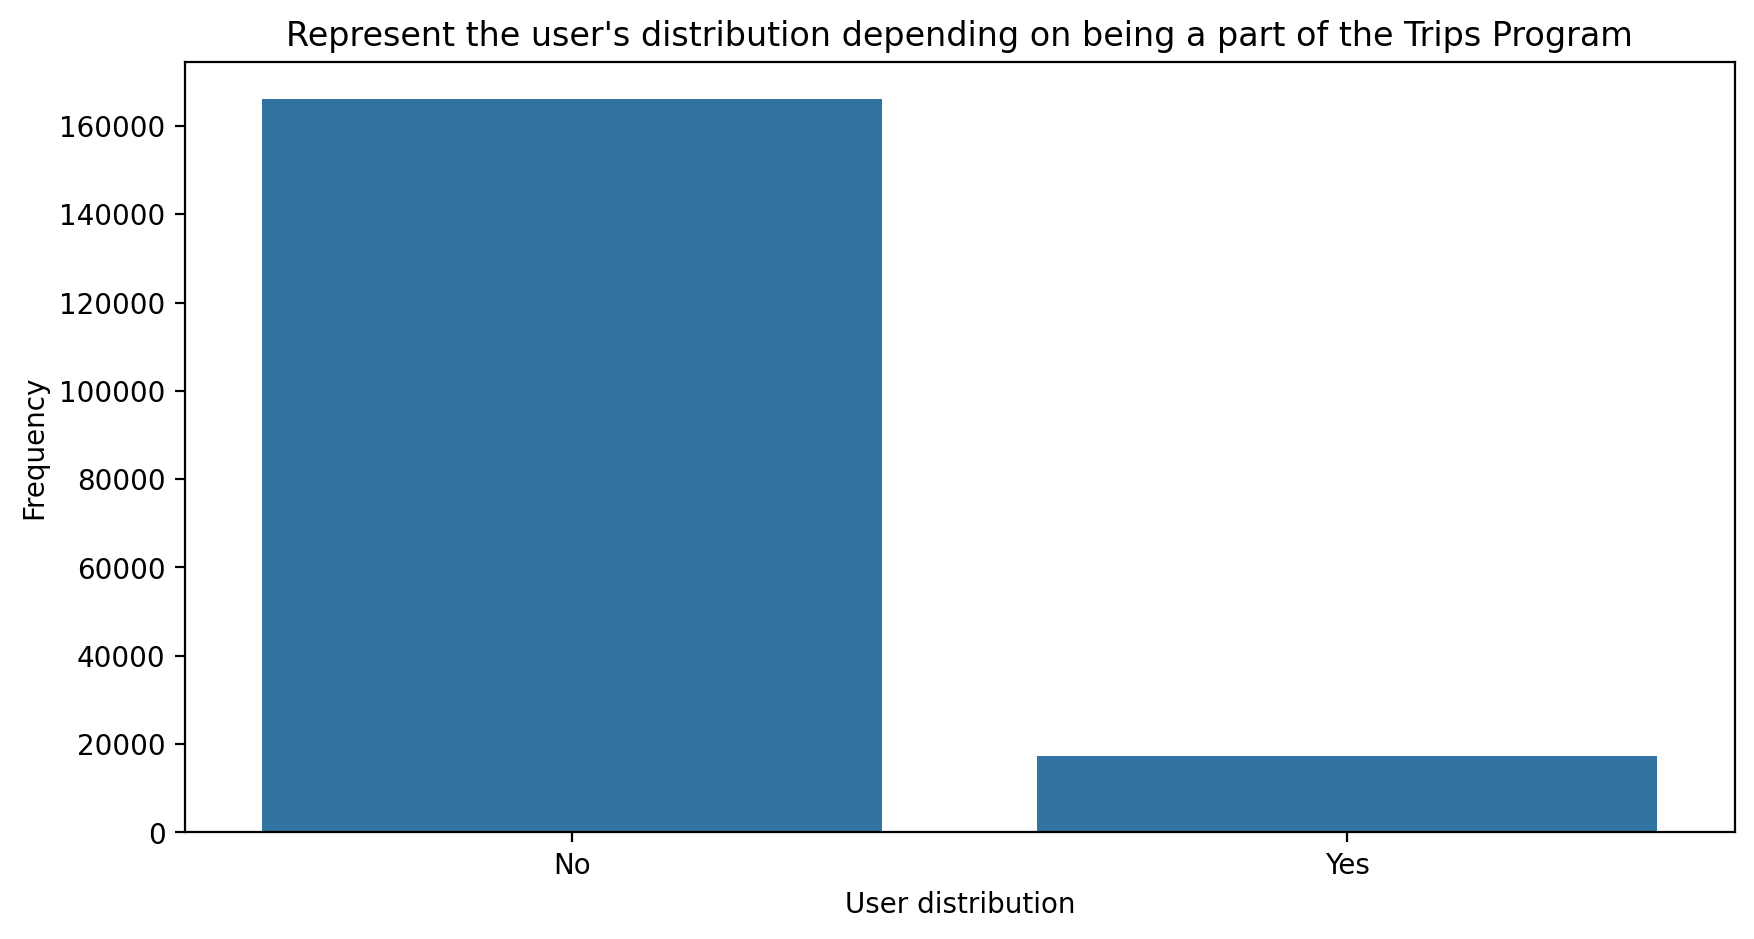

In [35]:
## I will import seaborn library to support me in making visualizations 

import seaborn as sns
plt.figure(figsize = (10,5), dpi = 200)

plot = sns.countplot(data=df, x='bike_share_for_all_trip')

plt.xlabel('User distribution')
plt.ylabel('Frequency')
plt.title("Represent the user's distribution depending on being a part of the Trips Program")

plt.show()

> ### <mark>Your analsys and exploration here </mark>

# <a id="2"> 2 ) What is the distribution for the bike share users on all Trips?</a>

## Left Skewed

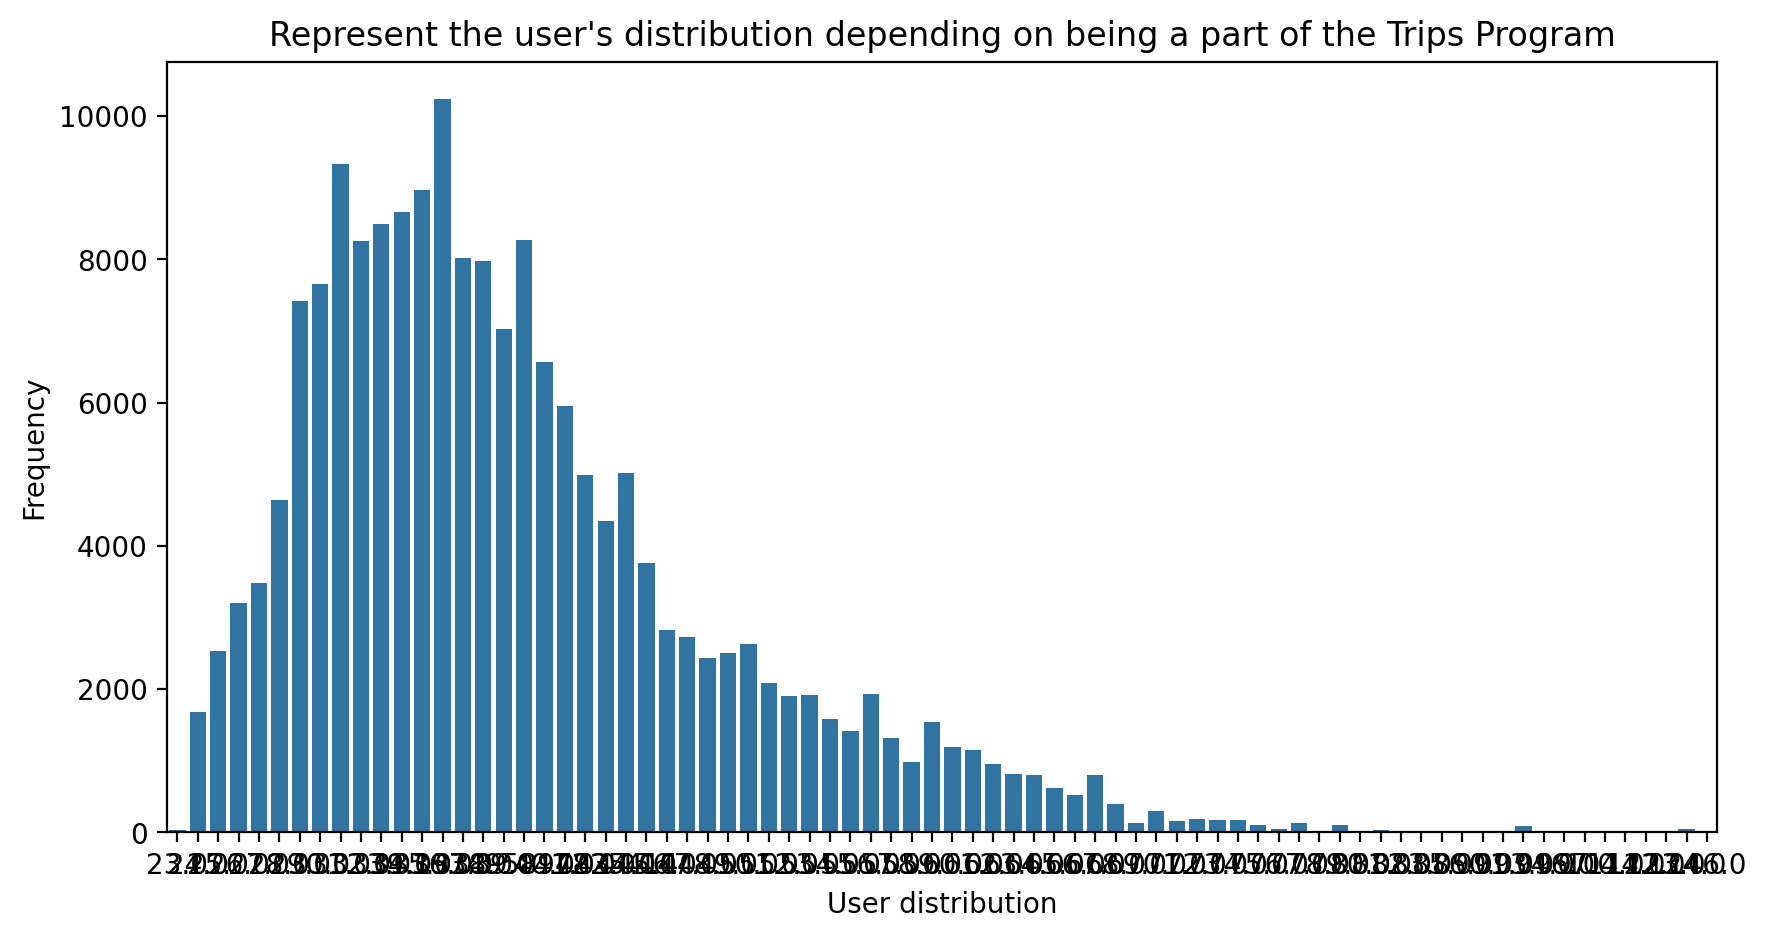

In [36]:
import seaborn as sns
plt.figure(figsize = (10,5), dpi = 200)

plot = sns.countplot(data=df, x='age')
plt.xlabel('User distribution')
plt.ylabel('Frequency')
plt.title("Represent the user's distribution depending on being a part of the Trips Program")

plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_33140\575257461.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('member_gender').age.plot(kind='kde')


member_gender
Female    Axes(0.125,0.11;0.775x0.77)
Male      Axes(0.125,0.11;0.775x0.77)
Name: age, dtype: object

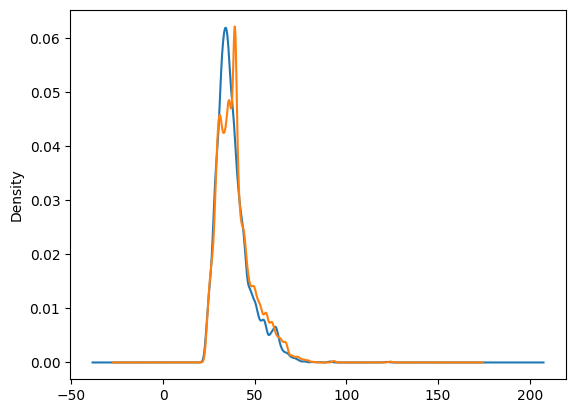

In [37]:
df.groupby('member_gender').age.plot(kind='kde')

# <a id="3"> 3 ) What is the distribution for users' ages? </a>

## Normal Distribution

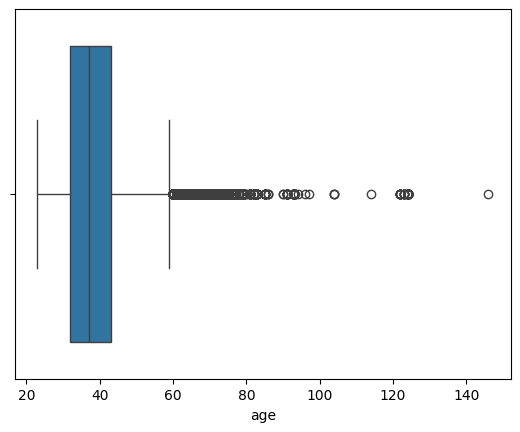

        duration_hour  duration_min  duration_sec start_time end_time  \
5                0.50         29.88          1793    49:58.6  19:51.8   
43               0.03          1.93           116    44:01.0  45:57.5   
67               0.19         11.35           681    19:37.4  30:58.9   
117              0.06          3.83           230    01:06.2  04:56.8   
152              0.06          3.60           216    45:22.2  48:58.8   
...               ...           ...           ...        ...      ...   
183296           0.13          7.65           459    15:05.2  22:44.3   
183304           0.10          6.22           373    42:44.7  48:58.1   
183305           0.03          1.67           100    46:54.8  48:34.8   
183385           0.11          6.67           400    46:47.3  53:27.6   
183388           0.14          8.17           490    39:53.1  48:03.3   

        start_station_id                                 start_station_name  \
5                  93.00                    

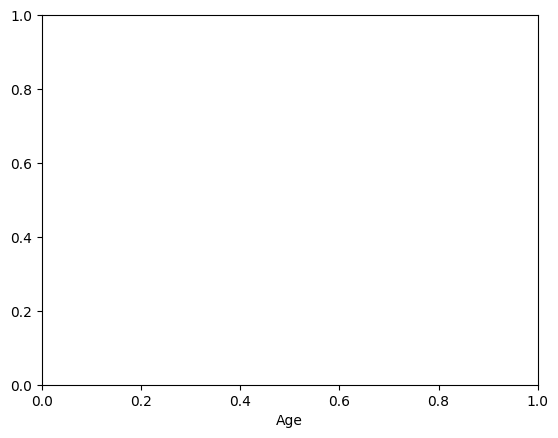

In [38]:
plot = sns.boxplot(x='age', data=df, orient='h')
plt.show()
plt.xlabel("Age")
# Identify outliers using IQR
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['age'] < Q1 - 1.5*IQR) | (df['age'] > Q3 + 1.5*IQR)]
print(outliers)




# <a id="4">  4 ) . Do the users' ages have outlier values?</a>


## YES

# <a id="5">  5 ) . What is the distribution for the trip duration in minutes? </a>

## SKEWED LEFT

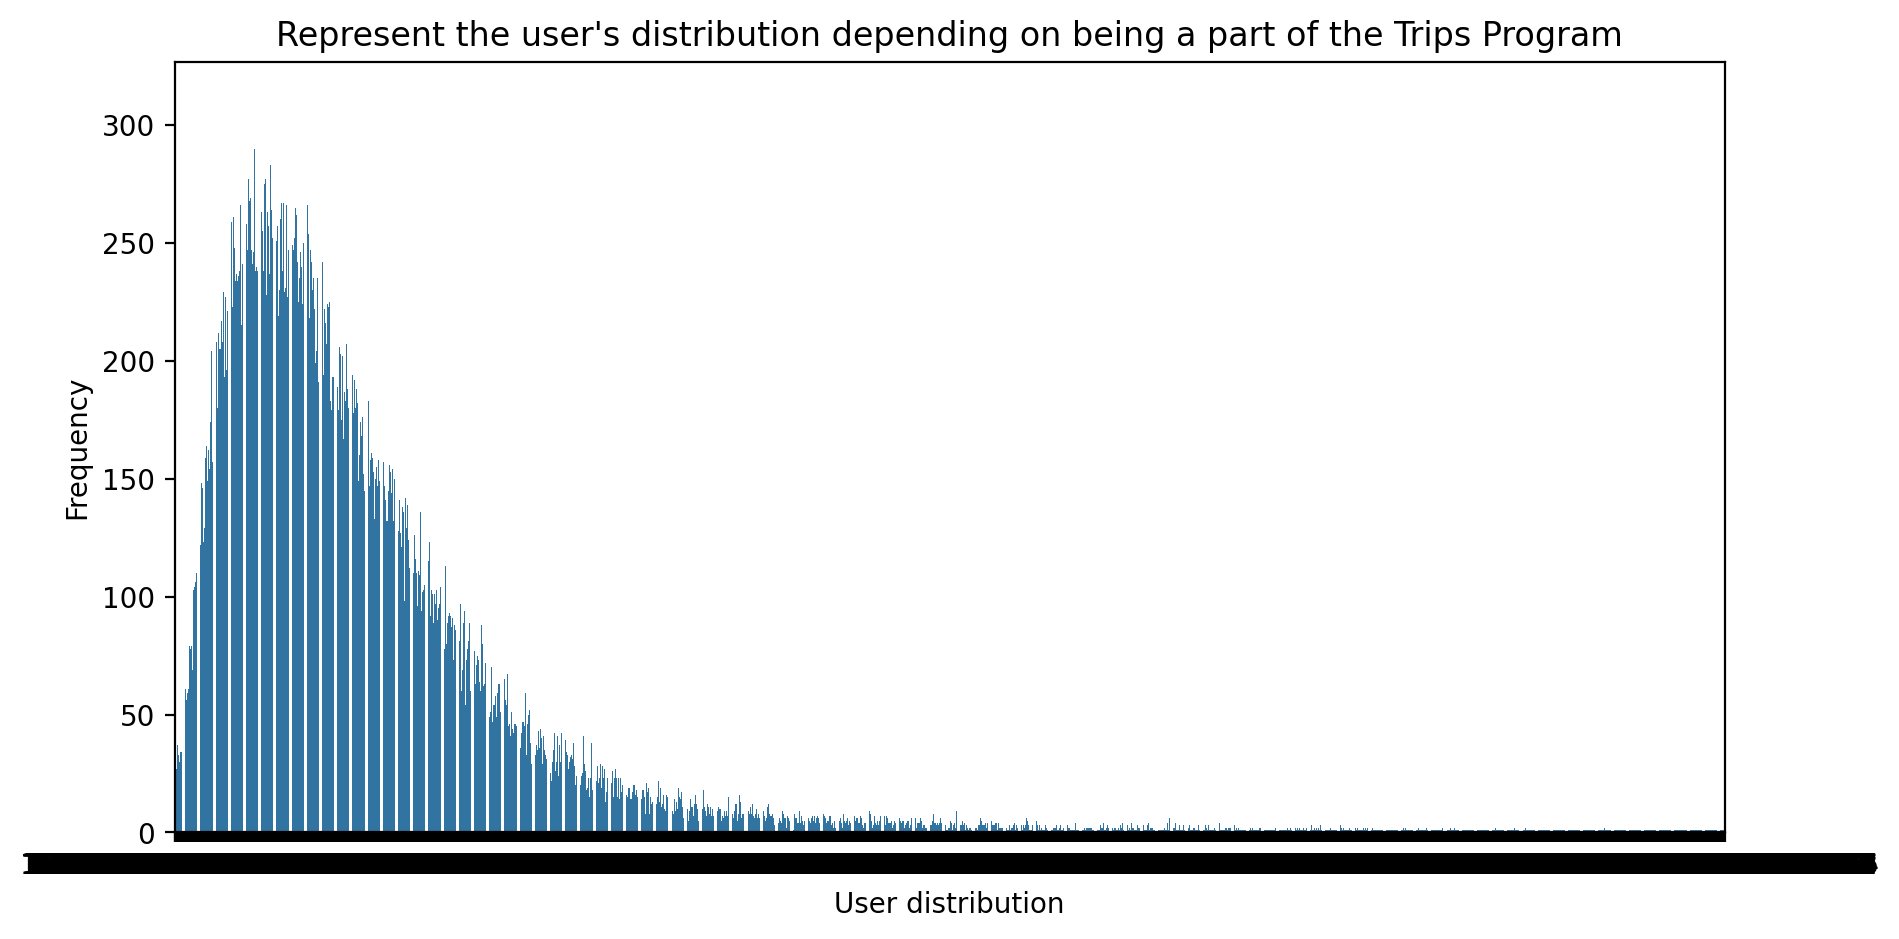

In [39]:
plt.figure(figsize = (10,5), dpi = 200)

plot = sns.countplot(data=df, x='duration_min')

plt.xlabel('User distribution')
plt.ylabel('Frequency')
plt.title("Represent the user's distribution depending on being a part of the Trips Program")

plt.show()

In [40]:
# Make visualization to easy get insight


> ### <mark>Your analsys and exploration here </mark>


# <a id="6"> 6 ) . What is the distribution for member_gender?</a>

## Skewed Left

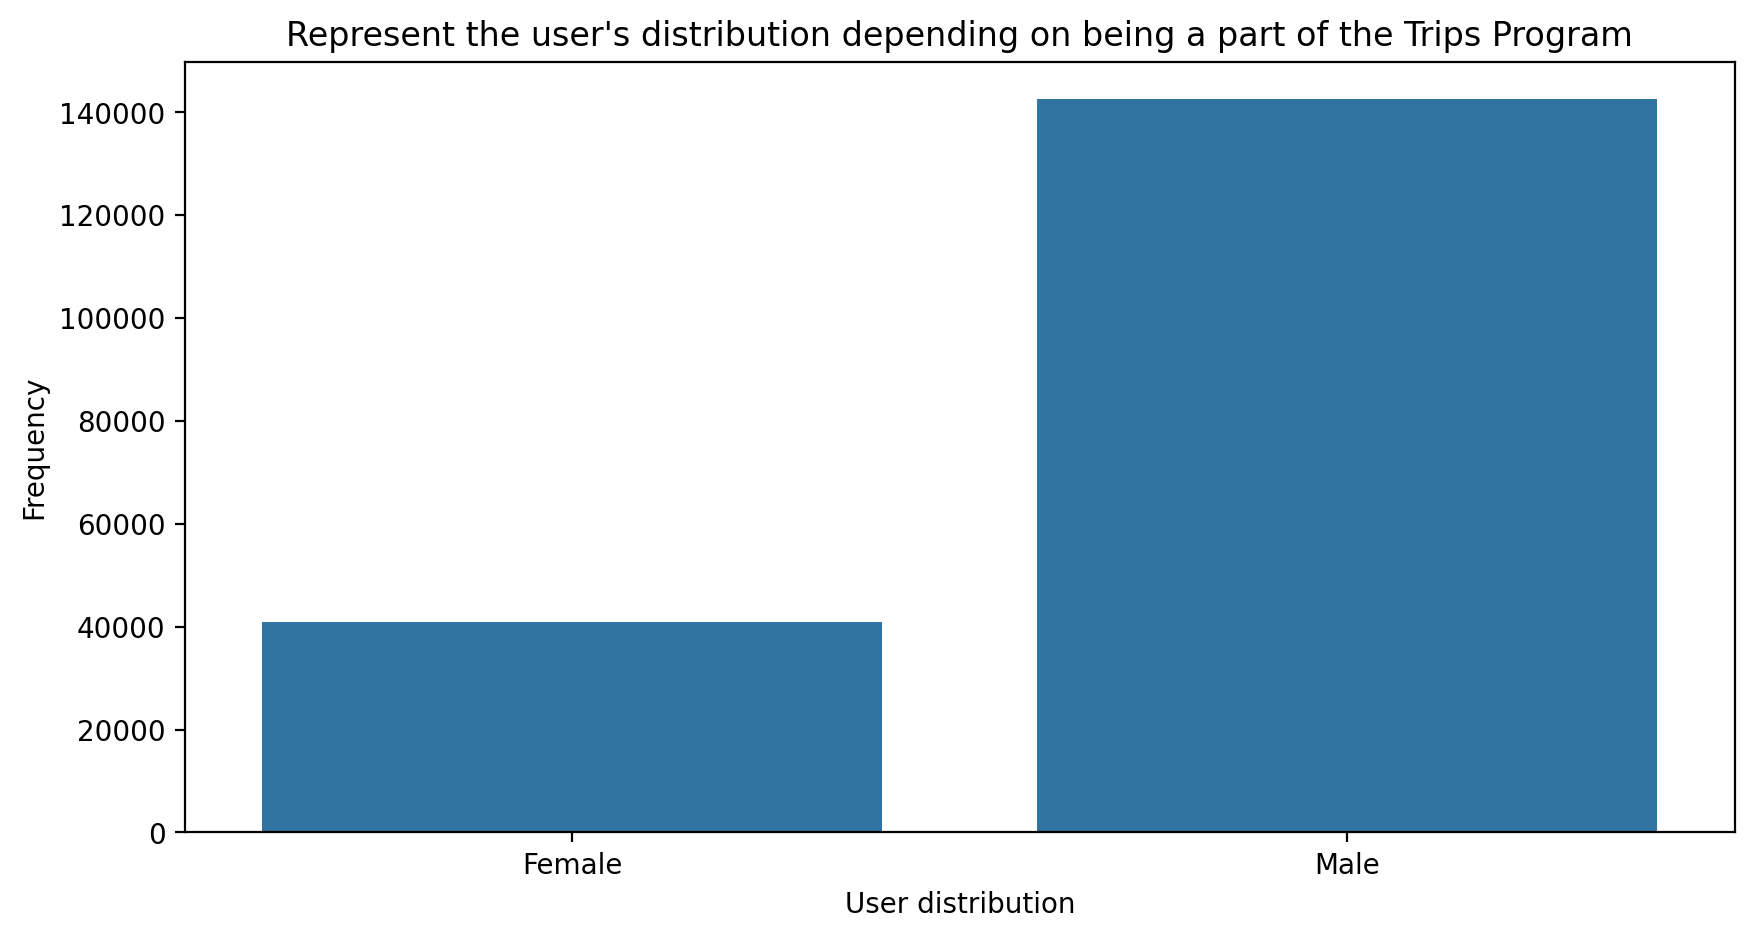

In [41]:
plt.figure(figsize = (10,5), dpi = 200)

plot = sns.countplot(data=df, x='member_gender')
plt.xlabel('User distribution')
plt.ylabel('Frequency')
plt.title("Represent the user's distribution depending on being a part of the Trips Program")

plt.show()

> ### <mark>Your analsys and exploration here </mark>

# <a id="7">    7 )  . What is the distribution for the trip duration in Hours?  </a>

## Skewed Right

> ### <mark>Your analsys and exploration here </mark>

### The variables distribution:


> The distribution of duration present that most of the trips were less than 30 minutes ( we can notice that from the minutes and the hour charts )


> And the Age distribution is ( left Skewed ) as most users age are  22 - 39


> Most users are subscribers, not Customers and  Males as shown in the charts above.



### Were there any interesting and outliers 


- We got Age outliers for for more than 100 .



- The distribution of duration was strange where the minutes and the hour charts were 30 minutes or less.

# <p style="border-radius:15px;border-style:solid;border-color:lightblue;border-width:3px;background-color:lightblue;padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Bivariate Exploration</p>
# <a id="111"> Bivariate Exploration</a>

Now let's investigate relationships between pairs of variables in our data.

In [42]:
df.head(15)

,duration_hour,duration_min,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,14.50,869.75,52185,32:10.1,01:56.0,21.00,Montgomery St BART Station (Market St at 2nd St),37.79,-122.40,13.00,Commercial St at Montgomery St,37.79,-122.40,4902,Customer,"1,984.00",Male,No,40.00
1,11.81,708.68,42521,53:21.8,42:03.1,23.00,The Embarcadero at Steuart St,37.79,-122.39,81.00,Berry St at 4th St,37.78,-122.39,2535,Customer,"1,984.81",Male,No,39.19
2,17.18,"1,030.90",61854,13:13.2,24:08.1,86.00,Market St at Dolores St,37.77,-122.43,3.00,Powell St BART Station (Market St at 4th St),37.79,-122.40,5905,Customer,"1,972.00",Male,No,52.00
3,10.14,608.17,36490,54:26.0,02:36.8,375.00,Grove St at Masonic Ave,37.77,-122.45,70.00,Central Ave at Fell St,37.77,-122.44,6638,Subscriber,"1,989.00",Male,No,35.00
4,0.44,26.42,1585,54:18.5,20:44.1,7.00,Frank H Ogawa Plaza,37.80,-122.27,222.00,10th Ave at E 15th St,37.79,-122.25,4898,Subscriber,"1,974.00",Male,Yes,50.00
5,0.50,29.88,1793,49:58.6,19:51.8,93.00,4th St at Mission Bay Blvd S,37.77,-122.39,323.00,Broadway at Kearny,37.80,-122.41,5200,Subscriber,"1,959.00",Male,No,65.00
6,0.32,19.12,1147,55:35.1,14:42.6,300.00,Palm St at Willow St,37.32,-121.88,312.00,San Jose Diridon Station,37.33,-121.90,3803,Subscriber,"1,983.00",Female,No,41.00
7,0.45,26.92,1615,41:06.8,08:02.8,10.00,Washington St at Kearny St,37.80,-122.40,127.00,Valencia St at 21st St,37.76,-122.42,6329,Subscriber,"1,989.00",Male,No,35.00
8,0.44,26.17,1570,41:48.8,07:59.7,10.00,Washington St at Kearny St,37.80,-122.40,127.00,Valencia St at 21st St,37.76,-122.42,6548,Subscriber,"1,988.00",Male,No,36.00
9,0.29,17.48,1049,49:47.7,07:17.0,19.00,Post St at Kearny St,37.79,-122.40,121.00,Mission Playground,37.76,-122.42,6488,Subscriber,"1,992.00",Male,No,32.00


# <a id="8"> 8) . What the average duration of trip for the categories of user type?</a>

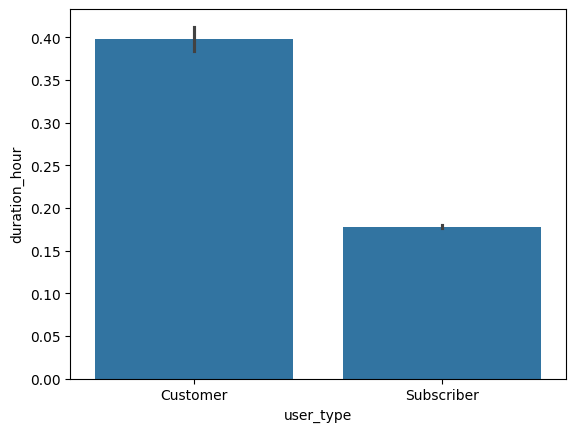

In [43]:
''' 
Since it is a distrbution between categorical and numerical data
a Bar plot / box plot will be used
'''
plot = sns.barplot(x='user_type', y='duration_hour', data=df) # x = categorical , y = numerical
plt.show()

In [44]:
mode_by_category = df.groupby('user_type')['duration_hour'].agg(pd.Series.mode)
print(mode_by_category)

user_type
Customer     0.14
Subscriber   0.08
Name: duration_hour, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_33140\3097997787.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mode_by_category = df.groupby('user_type')['duration_hour'].agg(pd.Series.mode)


# Make visualization to easy get insight


> ### <mark>Your analsys and exploration here </mark>

# <a id="9">    9 ) . How long is the duration of the trip for each gender in minutes?  </a>

In [45]:
# Make visualization to easy get insight

mode_by_category = df.groupby('member_gender')['duration_hour'].agg(pd.Series.mode)
print(mode_by_category)


member_gender
Female   0.10
Male     0.08
Name: duration_hour, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_33140\1953662300.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mode_by_category = df.groupby('member_gender')['duration_hour'].agg(pd.Series.mode)


# Make visualization to easy get insight


> ### <mark>Your analsys and exploration here </mark>

# <a id="10 "> 10 ) . How long is the duration of the trip for each user_type in minutes?  </a>

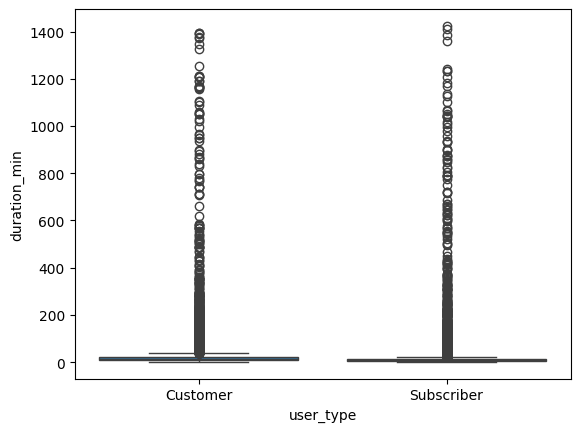

In [46]:
plot = sns.boxplot(x='user_type', y='duration_min', data=df) # x = categorical , y = numerical


> ### <mark>Your analsys and exploration here </mark>

# <a id="11">  11 ) . How the user distribution depending on their Age and user_type ? </a>

## Normal Distribution

In [47]:
dic = {
    'Customer':0,
    'Subscriber':1
}
user_typeBinary = df['user_type'].replace(dic)
df.insert(7, 'userTypeBinary' ,user_typeBinary)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_33140\4111386133.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  user_typeBinary = df['user_type'].replace(dic)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_33140\4111386133.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  user_typeBinary = df['user_type'].replace(dic)


In [48]:
df.head()

,duration_hour,duration_min,duration_sec,start_time,end_time,start_station_id,start_station_name,userTypeBinary,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,14.50,869.75,52185,32:10.1,01:56.0,21.00,Montgomery St BART Station (Market St at 2nd St),0,37.79,-122.40,13.00,Commercial St at Montgomery St,37.79,-122.40,4902,Customer,"1,984.00",Male,No,40.00
1,11.81,708.68,42521,53:21.8,42:03.1,23.00,The Embarcadero at Steuart St,0,37.79,-122.39,81.00,Berry St at 4th St,37.78,-122.39,2535,Customer,"1,984.81",Male,No,39.19
2,17.18,"1,030.90",61854,13:13.2,24:08.1,86.00,Market St at Dolores St,0,37.77,-122.43,3.00,Powell St BART Station (Market St at 4th St),37.79,-122.40,5905,Customer,"1,972.00",Male,No,52.00
3,10.14,608.17,36490,54:26.0,02:36.8,375.00,Grove St at Masonic Ave,1,37.77,-122.45,70.00,Central Ave at Fell St,37.77,-122.44,6638,Subscriber,"1,989.00",Male,No,35.00
4,0.44,26.42,1585,54:18.5,20:44.1,7.00,Frank H Ogawa Plaza,1,37.80,-122.27,222.00,10th Ave at E 15th St,37.79,-122.25,4898,Subscriber,"1,974.00",Male,Yes,50.00


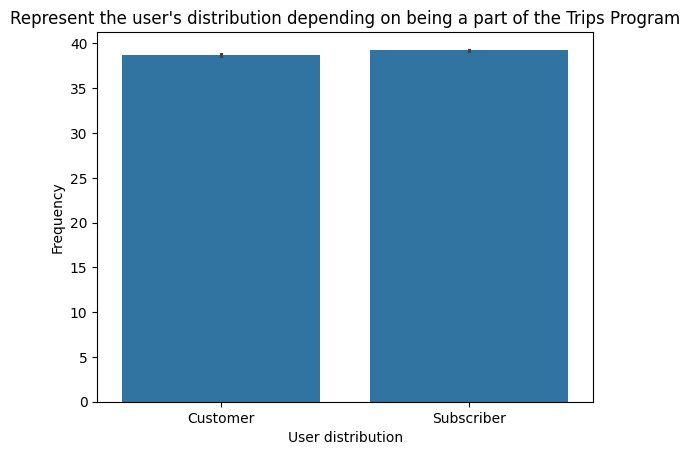

In [49]:

plot = sns.barplot(data=df, x='user_type',y = 'age')
plt.xlabel('User distribution')
plt.ylabel('Frequency')
plt.title("Represent the user's distribution depending on being a part of the Trips Program")

plt.show()

> ### <mark>Your analsys and exploration here </mark>

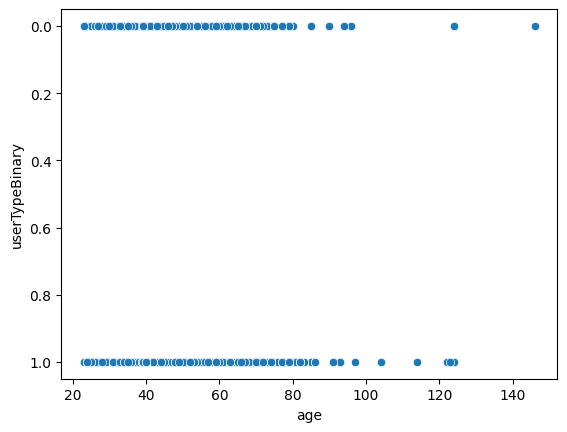

In [50]:
sns.scatterplot(x='age', y='userTypeBinary', data=df)
plt.show()

#  <a id="12"> 12 ). How the user distribution depending on their Age and member_gender ?</a>

## Normal

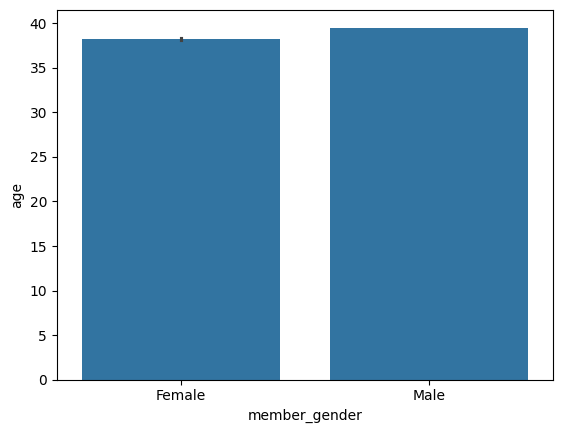

In [51]:
plot = sns.barplot(x = 'member_gender' , y = 'age' , data = df)


> ### <mark>Your analsys and exploration here </mark>

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The dataset is well-collected, as most of the relationships between variant is normal disturbed.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> age and gender were interesting and they are almost equal to each other which means that while targeting the audinece to our
bike systems it doesn't matter whether the user is male or female. but it's preferable to target the male audience than females

# <p style="border-radius:15px;border-style:solid;border-color:lightblue;border-width:3px;background-color:lightblue;padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Multivariate Exploration</p>
# <a id="1111"> Multivariate Exploration </a>

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [52]:
## check your work 



# <a id="13">  13 ) . What is the  Correlation between each variable in the dataset?</a>

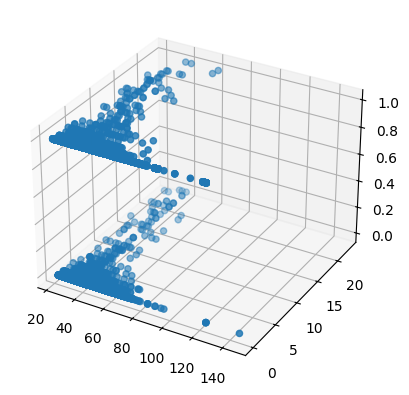

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'].astype(int), df['duration_hour'].astype(int), df["userTypeBinary"])
plt.show()



> ### <mark>Your analsys and exploration here </mark>

Example usage
- There is `no Correlation` for any variable with time ( `duration sec /minutes/hours`)



# <a id="14"> 14 )  .  What is the  Correlation between `specific numeric variables` in the dataset?</a>


In [54]:
numuric_col.extend(['duration_hour', "duration_min"])

In [55]:
numuric_col.append('age')

In [56]:
print(numuric_col)

['duration_sec', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'member_birth_year', 'duration_hour', 'duration_min', 'age']


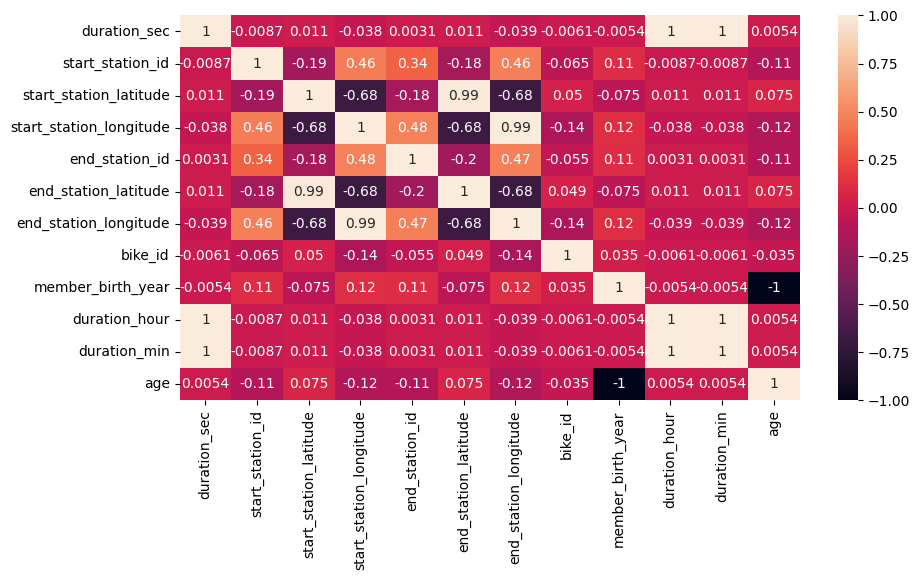

In [57]:
plt.figure(figsize=(10,5))
corr_matrix = df[numuric_col].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


> ### <mark>Your analsys and exploration here </mark>

Example usage
- There is `no Correlation` for any variable with time ( `duration sec /minutes`)




- 




- 




# <a id="15">  15 ) What is the  Correlation between data_stat variables in the dataset?</a>


> ### <mark>The above charts show how Correlation between specific numeric variables in the dataset using heatmap plots  </mark>



**Actually the `heat map`  display the above ideas in clear percentages**



- There is `no Correlation` for any variable with time ( `duration sec /minutes`)




- There is a `negative  Correlation` between  member_birth_year  and age which normal.




- There is `no significant Correlation` for any variable with `bike_id `



# <p style="border-radius:15px;border-style:solid;border-color:lightblue;border-width:3px;background-color:lightblue;padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Conclusions</p>
# <a id="1100"> Conclusions </a>

#example
- Most users were Male.


- 

- 

- 



## limitation 
example
- We got missing data which we fix some of them.
